In [11]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import regex
import re
import datetime





path_to_json = '/Users/alison/insight/Insight Fellows_Slack/general/'
json_filenames = [path_to_json+pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

print(json_filenames[:10])

['/Users/alison/insight/Insight Fellows_Slack/general/2016-07-22.json', '/Users/alison/insight/Insight Fellows_Slack/general/2017-01-18.json', '/Users/alison/insight/Insight Fellows_Slack/general/2017-03-25.json', '/Users/alison/insight/Insight Fellows_Slack/general/2015-04-11.json', '/Users/alison/insight/Insight Fellows_Slack/general/2017-11-18.json', '/Users/alison/insight/Insight Fellows_Slack/general/2018-05-26.json', '/Users/alison/insight/Insight Fellows_Slack/general/2016-08-11.json', '/Users/alison/insight/Insight Fellows_Slack/general/2017-02-08.json', '/Users/alison/insight/Insight Fellows_Slack/general/2015-07-01.json', '/Users/alison/insight/Insight Fellows_Slack/general/2017-07-31.json']


In [12]:
len(json_filenames)

989

In [13]:
df = pd.DataFrame()
for file_path in json_filenames:
    temp_df = pd.read_json(file_path)
  #df = df.append(temp_df[['type', 'user', 'text', 'ts']])
    df = df.append(temp_df[['text', 'ts']])

In [14]:
#new data column of converted Unix series to datetime
df['NewTime'] = pd.to_datetime(df['ts'], unit='s')

In [15]:
#sorted dataframe by date
df = df.sort_values(by='NewTime')

In [16]:
#drop rows that say joined channel
df = df[df.text.str.contains("has joined the channel") == False]

In [17]:
len(df)

10362

In [18]:
#lowercase everything that is an object
df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)


In [19]:
df[:10]

,text,ts,NewTime
2,welcome fellow fellows!,1.420829e+09,2015-01-09 18:51:35.000004
4,can you invite others? i've invited everyone f...,1.420830e+09,2015-01-09 18:52:20.000006
8,hello world!,1.420831e+09,2015-01-09 19:11:07.000010
10,tomv: how's dow jones / news corp. treating yo...,1.420831e+09,2015-01-09 19:11:43.000012
11,hi all!,1.420831e+09,2015-01-09 19:15:07.000013
12,hello!,1.420832e+09,2015-01-09 19:26:21.000014
13,<@u03ay3ftz>: fabulous thank you,1.420832e+09,2015-01-09 19:26:32.000015
14,i've only deeply offended 4 people so far,1.420832e+09,2015-01-09 19:26:48.000016
15,so it's a major win,1.420832e+09,2015-01-09 19:26:52.000017
16,although i've spent the last week doing nothin...,1.420832e+09,2015-01-09 19:27:28.000018


In [20]:
#pull out questions
df_quest = df[df['text'].str.startswith(('how','what','why','where','when', 'can'))]

In [21]:
len(df_quest)

232

In [22]:
#Preprocessing

df_quest_list1= [re.sub('\\n', '',x) for x in df_quest['text']]
#remove user tags and URLS
df_quest_list2 = [re.sub('<.*?>', '', i) for i in df_quest_list1]
#remove :: emojis 
df_quest_list3= [re.sub(':\w+:', '', p) for p in df_quest_list2] 
#list_clean3= [re.sub(':[a-z_]:/', '', p) for p in list_clean2] 
#remove \\
df_quest_list4 = [re.sub(r"\\", "", q) for q in df_quest_list3] 

In [23]:
df_quest_list4[:10]

["can you invite others? i've invited everyone from our class, but it'd be great to have all fellows on this same slack, don't you think?",
 'what exactly were you trying to do there joshainsley ?',
 'how many alumni are actually on here? i think it might just be me and british matt from my session.',
 'can you install it via apt-get?',
 'how is x distributed?',
 'how and where companies are applying machine learning: ',
 'what is setting?',
 'what is the study for?',
 'what is your use case?',
 'how about a colo ?']

In [24]:
df_quest_list4[1].split()

['what',
 'exactly',
 'were',
 'you',
 'trying',
 'to',
 'do',
 'there',
 'joshainsley',
 '?']

In [59]:
big_string = ''
for combine_list in df_quest_list4:
    
    big_string += ' '+ combine_list + ' '

In [60]:
big_string

' can you invite others? i\'ve invited everyone from our class, but it\'d be great to have all fellows on this same slack, don\'t you think?  what exactly were you trying to do there joshainsley ?  how many alumni are actually on here? i think it might just be me and british matt from my session.  can you install it via apt-get?  how is x distributed?  how and where companies are applying machine learning:   what is setting?  what is the study for?  what is your use case?  how about a colo ?  how do those headphones even stay on?  how about mode analytics?  what time does it start?  why is boss anti-scala?  what\'s reddit\'s button all about??  what kind of strategies do you all use for isolating your \'production\' database from your \'research\' database?(e.g. clone + custom tables?,  read-only slave + ?,  data-warehouse layer like redshift?)advantages? disadvantages?  what happens when you make a neural network hallucinate?   can be summarized in a single bullet point:* give everyon

In [61]:
#split one white space
words = big_string.split()
print(words)

['can', 'you', 'invite', 'others?', "i've", 'invited', 'everyone', 'from', 'our', 'class,', 'but', "it'd", 'be', 'great', 'to', 'have', 'all', 'fellows', 'on', 'this', 'same', 'slack,', "don't", 'you', 'think?', 'what', 'exactly', 'were', 'you', 'trying', 'to', 'do', 'there', 'joshainsley', '?', 'how', 'many', 'alumni', 'are', 'actually', 'on', 'here?', 'i', 'think', 'it', 'might', 'just', 'be', 'me', 'and', 'british', 'matt', 'from', 'my', 'session.', 'can', 'you', 'install', 'it', 'via', 'apt-get?', 'how', 'is', 'x', 'distributed?', 'how', 'and', 'where', 'companies', 'are', 'applying', 'machine', 'learning:', 'what', 'is', 'setting?', 'what', 'is', 'the', 'study', 'for?', 'what', 'is', 'your', 'use', 'case?', 'how', 'about', 'a', 'colo', '?', 'how', 'do', 'those', 'headphones', 'even', 'stay', 'on?', 'how', 'about', 'mode', 'analytics?', 'what', 'time', 'does', 'it', 'start?', 'why', 'is', 'boss', 'anti-scala?', "what's", "reddit's", 'button', 'all', 'about??', 'what', 'kind', 'of',

In [62]:
len(words)

4278

In [63]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = []

for token in words:
    lemmatized_tokens.append(lemmatizer.lemmatize(token))

In [74]:
len(lemmatized_tokens)

4278

In [65]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
#remove stopwords
cleaned_tokens = []
for token in words:
    if token not in stop:
        cleaned_tokens.append(token)
        

In [66]:
cleaned_tokens[:10]

['invite',
 'others?',
 "i've",
 'invited',
 'everyone',
 'class,',
 "it'd",
 'great',
 'fellows',
 'slack,']

In [67]:
word_dist = nltk.FreqDist(cleaned_tokens)

In [68]:
#Print list for common words 
for word, frequency in word_dist.most_common(20):
    print('{};{}'.format(word, frequency))

data;36
use;17
good;15
anyone;14
would;13
think;12
want;12
get;12
like;11
make;11
i'm;11
work;11
trying;10
?;10
what's;10
using;10
know;10
people;10
kind;9
one;9


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# stem our example article
stemmed_message = ' '.join(wd for wd in cleaned_tokens)

# performe a count-based vectorization of the document
article_vect = vectorizer.fit_transform([stemmed_message])



In [70]:
freqs = [(word, article_vect.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]


In [71]:
print(sorted (freqs, key = lambda x: -x[1])[0:5])


[('data', 46), ('use', 18), ('what', 16), ('good', 15), ('work', 15)]


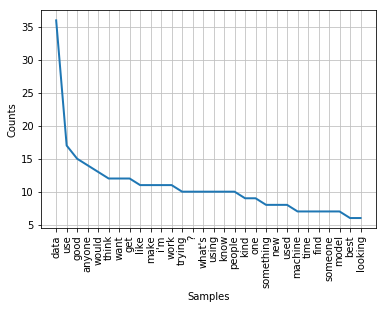

In [73]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
word_dist.plot(30, cumulative=False)


In [76]:
#remove stopwords from dataframe
#df_quest['text'] = df_quest[df_quest['text'].str.split(' ').apply(lambda x: ' '. join(k for k in x if k not in stop))]